$ \newcommand{\mbf}{\mathbf} $
$ \newcommand{\abs}[1]{\left\vert#1\right\vert} $
$ \newcommand{\se}[1]{\,\left\{#1\right\}\,} $
$ \newcommand{\norm}[1]{\left\Vert#1\right\Vert} $
# A reta dos mínimos quadrados

## $ \S 1 $ Descrição da reta dos mínimos quadrados

Suponha que queiramos ajustar uma função linear $ y = f(x) = ax + b $ a um conjunto de dados $ (x_0, y_0), \dots, (x_M, y_M) $. Sejam 
$$
r_i= y_i - f(x_i)
$$
os **resíduos**. Seguindo o método dos mínimos quadrados, devemos minimizar a função
$$
    S(a,b) = \sum_{i=0}^M r_i^2 = \sum_{i=0}^M \big[y_i - (a x_i + b)\big]^2
$$

Os pontos críticos são os pares $ (a, b) $ tais que:
$$
\begin{cases}
\displaystyle{\frac{\partial S}{\partial a}(a, b) = -2\sum_{i=0}^M x_i\,\big[y_i - (a x_i + b)\big] = 0} \\
\displaystyle{\frac{\partial S}{\partial b}(a, b) = -2\sum_{i=0}^M \big[y_i - (a x_i + b)\big] = 0}
\end{cases}
$$
ou equivalentemente,
\begin{equation*}\label{E:system}
\boxed{
\begin{cases}
\displaystyle{\Bigg(\sum_{i=0}^M x_i^2}\Bigg)\,a &+& \displaystyle{\Bigg(\sum_{i=0}^Mx_i\Bigg)\,b} & &= \displaystyle{\sum_{i=0}^M x_iy_i} \\
\displaystyle{\Bigg(\sum_{i=0}^M x_i}\Bigg)\,a &+& \displaystyle{(M+1)\,b} & &= \displaystyle{\sum_{i=0}^M y_i}
\end{cases}} \tag{1}
\end{equation*}

Provaremos na $ \S 3 $ que *este sistema tem uma única solução desde que os $ x_i $ não sejam todos iguais*. A solução $ (a, b) $ é de fato o único mínimo global de $ S $. A reta de equação $ y = ax + b $ correspondente é chamada de **reta dos mínimos quadrados**. 

**Exemplo 1:** Encontre a reta de mínimos quadrados para os dados abaixo:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ 1 $   | $ 0 $   |
| $ 2 $   | $ 2 $   |
| $ 3 $   | $ 2 $   |
| $ 4 $   | $ 5 $   |
| $ 5 $   | $ 4 $   |

**Solução:** Primeiro estendemos a tabela com duas colunas contendo os valores de $ x_i^2 $ e $ x_i y_i $ para cada $ i = 1, \dots, 4 $, e também uma nova linha em que são computadas as somas correspondentes a cada coluna:

| $ x_i $ | $ y_i $ | $ x_i^2 $ | $ x_iy_i $ |
|---------|---------|-----------|------------|
| $ 1 $   | $ 0 $   | $ 1 $     | $ 0 $      |
| $ 2 $   | $ 2 $   | $ 4 $     |  $ 4 $     |
| $ 3 $   | $ 2 $   | $ 9 $     | $ 6 $      |
| $ 4 $   | $ 5 $   | $ 16 $    | $ 20 $     |
| $ 5 $   | $ 4 $   | $ 25 $    | $ 20 $     |
|         |         |           |            |
| $ 15 $  | $ 13 $  | $ 55 $    | $ 50 $     |


Como indicado na última linha da tabela,
$$
\sum_{i=0}^{4} x_i = 15\,,\quad
\sum_{i=0}^{4} y_i = 13\,,\quad
\sum_{i=0}^{4} x_i^2 = 55\,,\quad
\sum_{i=0}^{4} x_iy_i = 50.
$$
Estes são os coeficientes do sistema \eqref{E:system}:
\begin{equation*}
\begin{cases}
55 a &+& 15 b & & = 50 \\
15 a &+&  5b & & = 13
\end{cases}
\end{equation*}
Agora calcula-se facilmente que a solução é $ a = \frac{11}{10} $ e $ b = \frac{-7}{10} $.

## $ \S 2 $ Implementação de procedimentos para encontrar e exibir a reta dos mínimos quadrados

In [8]:
def reta_minimos_quadrados(xs, ys):
    """
    Encontra os coeficientes da reta de mínimos quadrados para
    um conjunto de dados (x_i, y_i).
    Entradas:
        * Duas listas ou arrays xs e ys de mesmo comprimento,
          com pelo menos dois elementos distintos em xs.
    Saída:
        * Os coeficientes a e b da reta y = a * x + b de mínimos
          quadrados.
    """
    import numpy as np
    
    
    assert len(xs) == len(ys)
    # Verifique se há pelo menos dois x_i distintos:
    assert len(set(xs)) > 1
        
    M = len(xs) - 1
    xs = np.array(xs)
    ys = np.array(ys)
    xs_xs = xs * xs
    xs_ys = xs * ys
    
    # Monte a matriz A dos coeficientes e o lado direito c.
    A = np.zeros((2, 2))
    c = np.zeros(2)
    A[0][0] = np.sum(xs_xs)
    A[0][1] = A[1][0] = sum(xs)
    A[1][1] = M + 1
    c[0] = np.sum(xs_ys)
    c[1] = np.sum(ys)
    
    solucao = np.linalg.solve(A, c)
    a = solucao[0]
    b = solucao[1]
    
    return a, b

In [4]:
def exibe_pontos_e_reta(xs, ys, a, b):
    """
    Exibe um conjunto de pontos (x_i, y_i) e a reta de eq.
    y = a * x + b.
    Entradas:
        * Duas listas ou arrays xs e ys de mesmo comprimento.
        * Dois números a e b.
    Saída: nenhuma.
    """
    import matplotlib.pyplot as plt
    import numpy as np
    
    assert len(xs) == len(ys)
    x_min = min(xs)
    x_max = max(xs)
    folga = (x_max - x_min) / 10
    
    xs_reta = np.linspace(x_min - folga, x_max + folga, num=201)
    ys_reta = np.array([a * x + b for x in xs_reta]) 
    
    plt.plot(xs, ys, 'o')
    plt.plot(xs_reta, ys_reta, '-')
    plt.grid(True)
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend(("Dados", "Reta de mínimos quadrados"), loc=0)
    plt.show()
    
    return None

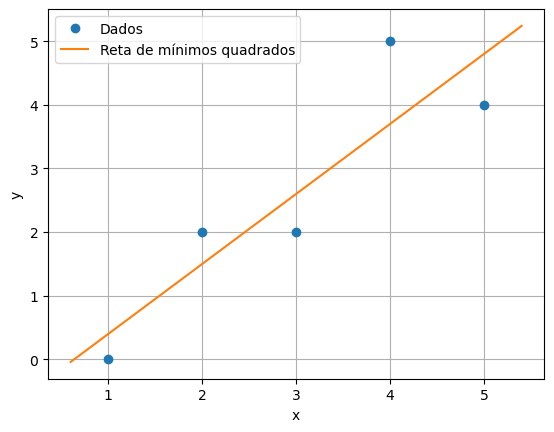

In [5]:
xs = [1, 2, 3, 4, 5]
ys = [0, 2, 2, 5, 4]
a, b = reta_minimos_quadrados(xs, ys)
exibe_pontos_e_reta(xs, ys, a, b)

## $ \S 3 $ Existência e unicidade da reta de mínimos quadrados

**Teorema 3.1:** *Dados $ (x_0,y_0)\,,\,(x_1,y_1)\,,\cdots,\,(x_M,y_M)\, $, existe uma única reta de mínimos quadrados adaptada a estes pontos desde que existam $ i $ e $ j $ com $ x_i \ne x_j $.*

**Prova:** Considere o sistema que define a reta dos mínimos quadrados:
\begin{equation*}\label{E:system2}
\begin{cases}
\displaystyle{\Bigg(\sum_{i=0}^M x_i^2}\Bigg)\,a &+& \displaystyle{\Bigg(\sum_{i=0}^Mx_i\Bigg)\,b} & &= \displaystyle{\sum_{i=0}^M x_iy_i} \\
\displaystyle{\Bigg(\sum_{i=0}^M x_i}\Bigg)\,a &+& \displaystyle{(M+1)\,b} & &= \displaystyle{\sum_{i=0}^M y_i}
\end{cases} \tag{2}
\end{equation*}

Sejam $ \mbf A $ a matriz dos coeficientes deste sistema, $ \mbf x = (x_0,x_1,\cdots,x_M) $ e $ \mbf u = (1,1,\cdots,1) \in \mathbb R^{M+1} $. Então
$$
\det(\mbf A) = (M+1) \sum_{i=0}^{M} x_i^2 - \Bigg( \sum_{i=0}^M x_i \Bigg)^2 = \norm{\mbf u}^2\norm{\mbf x}^2 - (\mbf u \cdot \mbf x)^2.
$$
Mas pela desigualdade de Cauchy-Schwarz,
$$
(\mbf u \cdot \mbf x)^2 \le \norm{\mbf u}^2\norm{\mbf x}^2 ,
$$
com igualdade se e somente se $ \mbf x $ é um múltiplo de $ \mbf u $, ou seja, se e somente se todos os $ x_i $ são iguais. Como esta possibilidade foi excluída por hipótese, concluímos que $ \det(\mbf A) > 0 $. Logo o sistema \eqref{E:system2} tem uma solução e esta solução é única. Isto significa que a função $ S $ tem exatamente um ponto crítico. Este é de fato o mínimo global de $ S $ em $ \mathbb R^2 $ porque
$$
\lim_{\norm{(a,b)} \to \infty} S(a,b) = +\infty\,. \tag*{$ \blacksquare $}
$$

## $ \S 4 $ Problemas

**Problema 1:** Usando o método dos mínimos quadrados, adapte uma reta aos dados tabelados abaixo:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ -3 $  | $ 3 $  |
| $ -2 $  |  $ 2 $  |
| $ -1 $  | $ 2 $   |
| $ 0 $   |  $ 1 $  |
| $ 1 $   |  $ 1 $  |
| $ 2 $   |  $ 0 $  |
| $ 3 $   |  $ -1 $  |

(a) Sem usar o computador.

(b) Usando o computador.

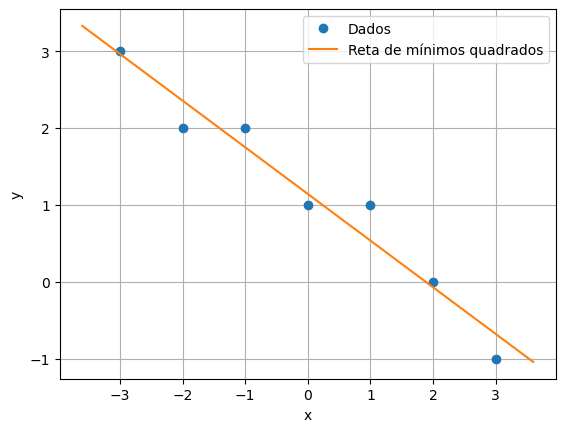

In [6]:
xs = list(range(-3, 4))
ys = [3, 2, 2, 1, 1, 0, -1]
a, b = reta_minimos_quadrados(xs, ys)
exibe_pontos_e_reta(xs, ys, a, b)

**Problema 2:** Ajuste uma reta aos dados abaixos:

| $ x_i $ | $ y_i $ |
|:-------:|:-------:|
| $ 2.5 $  | $ 1.7 $  |
| $ 1.7 $  | $ 1.4 $  |
| $ 3.2 $  | $ 2.5 $  |
| $ 0.7 $  | $ 0.6 $  |
| $ 0.3 $  | $ 0.1 $  |

**Problema 3:** A tabela seguinte coleta a altura e peso de vinte indivíduos.

| altura (em polegadas) | peso (em libras) |
|:---------------------:|:----------------:|
| $ 67.0 $              | $ 175.9 $        |
| $ 63.4 $              | $ 156.3 $        |
| $ 71.1 $              | $ 186.6 $        |
| $ 71.6 $              | $ 213.7 $        |
| $ 64.7 $              | $ 167.1 $        |
| $ 69.2 $              | $ 189.4 $        |
| $ 69.2 $              | $ 186.4 $        |
| $ 67.6 $              | $ 172.1 $        |
| $ 72.4 $              | $ 196.0 $        |
| $ 63.9 $              | $ 172.8 $        |
| $ 69.6 $              | $ 185.9 $        |
| $ 67.9 $              | $ 182.4 $        |
| $ 67.9 $              | $ 174.1 $        |
| $ 69.4 $              | $ 197.7 $        |
| $ 66.1 $              | $ 149.1 $        |
| $ 75.2 $              | $ 228.7 $        |
| $ 67.8 $              | $ 162.0 $        |
| $ 68.1 $              | $ 192.3 $        |
| $ 69.0 $              | $ 184.4 $        |
| $ 72.8 $              | $ 206.8 $        |

(a) Plote os pontos $ (h_i, p_i) $ onde $ h_i $ é a altura e $ p_i $ o peso do $ i $-ésimo indivíduo.

(b) Encontre a função da forma $ \text{peso} = a \cdot \text{altura} + b $ que melhor se ajusta a estes dados, e exiba seu gráfico juntamente com os dados.

(c) Estime o peso de uma pessoa de altura igual a $ 71.3 $ polegadas.

(d) Estime a altura de uma pessoa que pesa $ 158.3 $ libras.

In [80]:
alturas = [67.0,
           63.4,
           71.1,
           71.6,
           64.7,
           69.3,
           69.2,
           67.6,
           72.4,
           63.9,
           69.6,
           67.9,
           67.9,
           69.4,
           66.1,
           75.2,
           67.8,
           68.1,
           69.0,
           72.8]

pesos = [175.9,
         156.3,
         186.6,
         213.7,
         167.1,
         189.4,
         186.4,
         172.1,
         196.0,
         172.8,
         185.9,
         182.4,
         174.1,
         197.7,
         149.1,
         228.7,
         162.0,
         192.3,
         184.4,
         206.8]

**Problema 4:** A tabela seguinte fornece a população aproximada da Alemanha no período de 1816 a 1939.

| anos | habitantes (milhões) |
|:---:|:----------------------:|
| $ 1816 $ | $ 22.38 $ |
| $ 1828 $ | $ 26.65 $ |
| $ 1834 $ | $ 28.24 $ |
| $ 1840 $ | $ 30.38 $ |
| $ 1852 $ | $ 33.41 $ |
| $ 1861 $ | $ 35.57 $ |
| $ 1864 $ | $ 37.80 $ |
| $ 1871 $ | $ 41.06 $ |
| $ 1880 $ | $ 45.23 $ |
| $ 1890 $ | $ 49.43 $ |
| $ 1900 $ | $ 56.37 $ |
| $ 1910 $ | $ 64.93 $ |
| $ 1925 $ | $ 63.18 $ |
| $ 1933 $ | $ 66.03 $ |
| $ 1939 $ | $ 69.46 $ |

(a) Plote o par (ano, população) para cada linha fornecida.

(b) Verifique que parece existir uma relação aproximadamente linear entre o ano e a população. Encontre $ a $ e $ b $ de modo que a função:
$$
\text{população}  = a \cdot ano + b
$$
se ajuste aos dados da melhor maneira possível.

(c) Estime a população da Alemanha no ano de $ 1800 $ a partir dos dados.

(d) Encontre o ano e mês em que a população da Alemanha superou $ 60 $ milhões de habitantes.

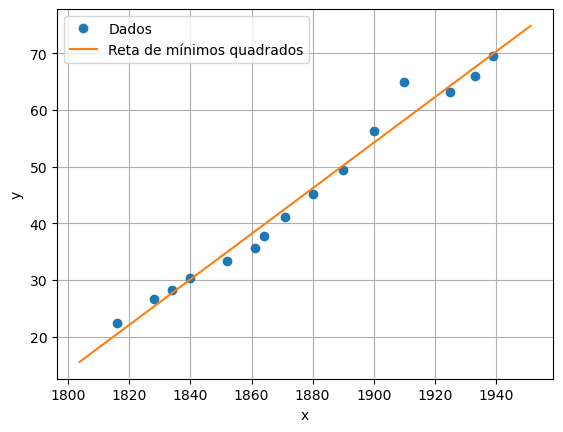

In [7]:
anos = [1816,
        1828,
        1834,
        1840,
        1852,
        1861,
        1864,
        1871,
        1880,
        1890,
        1900,
        1910,
        1925,
        1933,
        1939]

populacao = [22.38,
             26.65,
             28.24,
             30.38,
             33.41,
             35.57,
             37.80,
             41.06,
             45.23,
             49.43,
             56.37,
             64.93,
             63.18,
             66.03,
             69.46]

a, b = reta_minimos_quadrados(anos, populacao)
exibe_pontos_e_reta(anos, populacao, a, b)